<a href="https://colab.research.google.com/github/peravali810/HuggingFace/blob/main/HuggingFacePipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U transformers datasets sentencepiece sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00


In [2]:
from transformers import pipeline
import pandas as pd

#Text Classification


##Postive or Negative

In [11]:
textClassifier = pipeline("text-classification")

text = "I love you"
result = textClassifier(text)
pd.DataFrame(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,label,score
0,POSITIVE,0.999866


##Based on Emotion

In [14]:
textClassifier = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

text = "I hate you"
result = textClassifier(text)
pd.DataFrame(result)

Device set to use cuda:0


,label,score
0,anger,0.842576


#Named Entity Recognition

##Using default model

In [19]:
ner_tag = pipeline("ner", aggregation_strategy="simple")

text = "I'm Jaganmohan Reddy, a graduate research assistant at University of Louisiana at Lafayette"
result = ner_tag(text)
pd.DataFrame(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


,entity_group,score,word,start,end
0,PER,0.999107,Jaganmohan Reddy,4,20
1,ORG,0.942845,University of Louisiana at Lafayette,55,91


##Using custom model

In [22]:
ner_tag = pipeline("ner", aggregation_strategy="simple", model="ml6team/keyphrase-extraction-distilbert-inspec")

text = "I'm Jaganmohan Reddy, a graduate research assistant at University of Louisiana at Lafayette"
result = ner_tag(text)
pd.DataFrame(result)

Device set to use cuda:0


,entity_group,score,word,start,end
0,KEY,0.970432,university of louisiana at lafayette,55,91


#Question and Answering

In [31]:
text = """SpaceX, founded by Elon Musk in 2002, is an aerospace company that designs and launches advanced rockets and spacecraft.
It became the first private company to send humans to space with the Crew Dragon mission in 2020. """

reader_model = pipeline("question-answering", model="consciousAI/question-answering-roberta-base-s-v2")
question="Who founded spacex?"
ans = reader_model(question=question, context=text)
pd.DataFrame([ans])


Device set to use cuda:0


,score,start,end,answer
0,0.997334,19,28,Elon Musk


#Summarization

In [35]:
text = """SpaceX, founded by Elon Musk in 2002, is an aerospace company that designs and launches advanced rockets and spacecraft.
It became the first private company to send humans to space with the Crew Dragon mission in 2020. """

textSummarize = pipeline("summarization")

summary = textSummarize(text)

summary[0]['summary_text']

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Your max_length is set to 142, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


' SpaceX is the first private company to send humans to space with the Crew Dragon mission in 2020 . SpaceX was founded by Elon Musk in 2002 . It is designed and launches advanced rockets and spacecraft . SpaceX is scheduled to be first private firm to launch humans into space with a crew Dragon mission .'

#Text Generation

In [36]:
from transformers import set_seed
set_seed(14)

In [37]:
textGenerate = pipeline("text-generation")

text = "Hi, I ordered a pack of 12 water bottles from Costco online, but only received 6. Can you help?"
response = "Hello! We’re sorry for the missing items in your order. Could you please share your order number so we can check the details?"

prompt = "User:" + text + "Costco Customer Support:" + response

result = textGenerate(prompt, max_length=128)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [38]:
result

[{'generated_text': 'User:Hi, I ordered a pack of 12 water bottles from Costco online, but only received 6. Can you help?Costco Customer Support:Hello! We’re sorry for the missing items in your order. Could you please share your order number so we can check the details?Costco Customer Support:Hey, I am just wondering about your question from me for a few minutes and so could you please tell me if you were able to access the service and if you can go ahead and call us immediately. We are very sorry that this issue has come to our attention after you mentioned how hard you were trying, with the'}]

#Image Classification

##Using default model

In [56]:
from PIL import Image
import requests

In [57]:
url = "https://www.bil-jac.com/media/j1hodeqf/labrador-962177576.jpg?anchor=center&mode=crop&width=600&height=400&rnd=132164917428370000&format=webp&quality=80"

image = Image.open(requests.get(url, stream = True).raw)


In [58]:
imageClassy = pipeline("image-classification")
imageClassy(image)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': 'Labrador retriever', 'score': 0.6059266328811646},
 {'label': 'German short-haired pointer', 'score': 0.07311397790908813},
 {'label': 'flat-coated retriever', 'score': 0.06643619388341904},
 {'label': 'curly-coated retriever', 'score': 0.05259677395224571},
 {'label': 'Brabancon griffon', 'score': 0.02819572016596794}]

##Age Detection model

In [55]:


url = "https://www.shutterstock.com/image-photo/headshot-portrait-handsome-guy-19-260nw-2457814671.jpg"

image = Image.open(requests.get(url, stream = True).raw)

imageClassy = pipeline("image-classification", model="nateraw/vit-age-classifier")
age = imageClassy(image)
pd.DataFrame(age)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


,label,score
0,20-29,0.625505
1,10-19,0.307314
2,30-39,0.058363
3,3-9,0.004839
4,40-49,0.003530


#Image Segmentation

In [64]:
url = "https://thumbs.dreamstime.com/b/boy-playing-his-dog-vector-illustration-handsome-little-park-32270022.jpg"

image = Image.open(requests.get(url, stream = True).raw)

In [66]:
iSegment = pipeline("image-segmentation")

result = iSegment(image)
pd.DataFrame(result)

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

,score,label,mask
0,0.993958,LABEL_187,<PIL.Image.Image image mode=L size=800x534 at ...
1,0.999045,frisbee,<PIL.Image.Image image mode=L size=800x534 at ...
2,0.977642,LABEL_193,<PIL.Image.Image image mode=L size=800x534 at ...


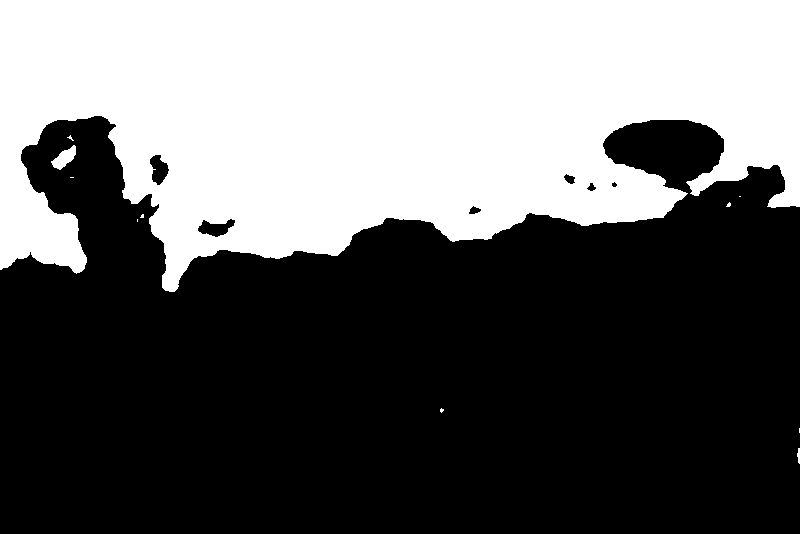

In [76]:
result[0]['mask']